(1797, 8, 8)
(1797,)
Classifier Report:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        60
          1       0.98      1.00      0.99        59
          2       1.00      1.00      1.00        61
          3       0.98      0.96      0.97        53
          4       0.98      1.00      0.99        64
          5       0.98      0.96      0.97        53
          6       0.98      1.00      0.99        60
          7       0.98      1.00      0.99        60
          8       1.00      0.97      0.98        65
          9       0.97      0.98      0.97        59

avg / total       0.99      0.99      0.99       594

Confusion matrix:
[[59  0  0  0  1  0  0  0  0  0]
 [ 0 59  0  0  0  0  0  0  0  0]
 [ 0  0 61  0

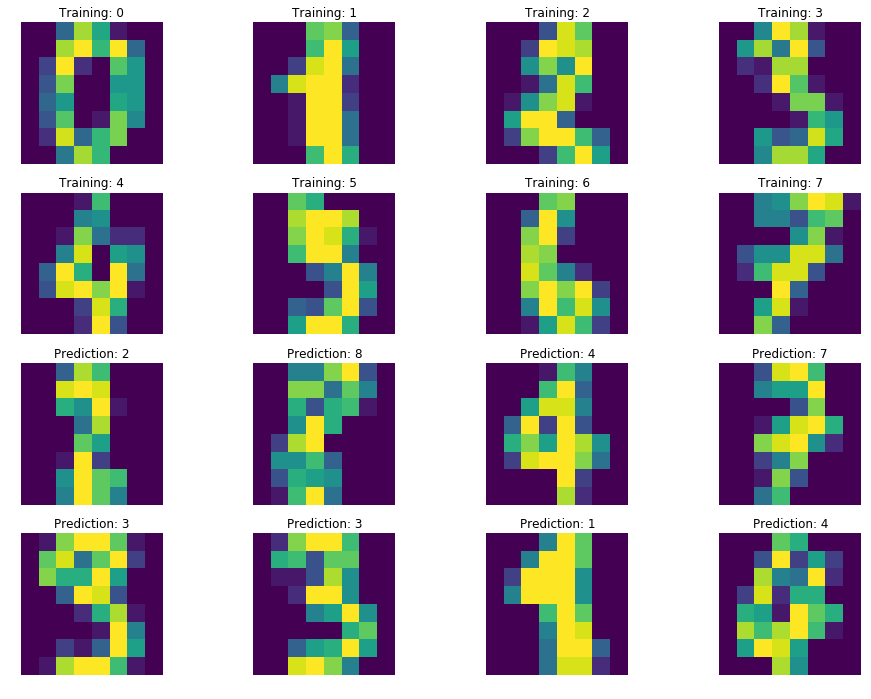

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size.
X = digits.images
y = digits.target

print(X.shape)
print(y.shape)


    
# flattern images to feed in the classifier
n_samples = len(digits.images)
X = X.reshape(n_samples, -1)


plt.figure(figsize=(16,12))
for index, (image, label) in enumerate(zip(X[:8],y[:8])):
    plt.subplot(4,4,index+1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8))
    #print(index)
    plt.title('Training: %i' % label)  
    
    
svmc = svm.SVC(C=10,gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
                                X,y,test_size=0.33)

svmc.fit(X_train,y_train)
y_pred = svmc.predict(X_test)

print('Classifier Report:\n{0}\n\n{1}'.format(svmc, 
                                metrics.classification_report(y_test, y_pred)))
print('Confusion matrix:\n{}'.format(metrics.confusion_matrix(y_test, y_pred)))

for index, (image, pred) in enumerate(zip(X_test[:8],y_pred[:8])):
    plt.subplot(4,4,index+1+8)
    plt.axis('off')
    plt.imshow(image.reshape(8,8))
    plt.title('Prediction: {}'.format(pred))

print('Score:{}'.format(svmc.score(X_test, y_test)))

[7 6 3 1 5 9 4 9]


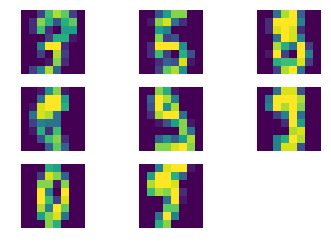

In [62]:
index_wrong = y_test!=y_pred
X_test[index_wrong].shape

for index,image in enumerate(X_test[index_wrong]):
    plt.subplot(3,3,index+1)
    plt.imshow(image.reshape(8,8))
    plt.axis('off')

print(y_pred[index_wrong])

In [63]:
from sklearn.model_selection import cross_val_score

svmc2 = svm.SVC(C=10,gamma=0.001)
scores = cross_val_score(svmc2, X_train, y_train, cv=5)
scores

array([ 0.99591837,  0.98347107,  0.99170124,  0.9748954 ,  0.99576271])

In [64]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.02)


In [65]:
from sklearn.model_selection import cross_val_predict
svmc3 = svm.SVC(C=10, gamma=0.001)
pred = cross_val_predict(svmc3, X_train, y_train, cv=10)
metrics.accuracy_score(y_train, pred)

0.9900249376558603

In [56]:
np.array([[1, 2], [3, 4], [1, 2], [3, 4]])

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [57]:
svmc3.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

scores = ['precision','recall']
for score in scores:
    clf = GridSearchCV(svm.SVC(),param_grid,cv=10,
                      scoring='{}_macro'.format(score))
    clf.fit(X_train, y_train)
    
    print(clf.best_params_)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()    
    

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.979 (+/-0.020) for {'C': 1, 'kernel': 'linear'}
0.979 (+/-0.020) for {'C': 10, 'kernel': 'linear'}
0.979 (+/-0.020) for {'C': 100, 'kernel': 'linear'}
0.979 (+/-0.020) for {'C': 1000, 'kernel': 'linear'}
0.990 (+/-0.021) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.969 (+/-0.034) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.022) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.985 (+/-0.018) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.022) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.985 (+/-0.020) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.022) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.985 (+/-0.020) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        60
          1       0.98      1.00      0.99        59
          2       1.00      1.00      1.00        61
          3       

In [68]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape

Using TensorFlow backend.


(50000, 32, 32, 3)